### Task 4.2
Пусть все население (NN индивидов) делится на три группы: индивиды, которые восприимчивы к данной болезни, но здоровы (susceptible) — S(t)S(t); зараженные индивиды (infected) — I(t)I(t) (они больны сами и являются носителями болезни) и здоровые индивиды, обладающие иммунитетом к данной болезни (recovered) — R(t)R(t).

Для того, чтобы решения соответствующих уравнений определялись однозначно, необходимо задать начальные условия. Примем, что:

α=0.5
β=0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t_0, t_f = 0, 25

Необходимо выполнить:

Решить дифференциальное уравнение (2) и построить график функции S(t)
Решить дифференциальное уравнение (3) и построить график функции I(t)
Используя решения уравнений (2) и (3), с помощью уравнения (1), найти решение уравнения (4) (используйте интерполяцию interp1d) и построить график функции R(t)
Построить все три графика S(t), I(t) и R(t) на одной области отображения

In [9]:
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

In [10]:
alpha=0.5 
beta=0.3 
N = 1000000 
S = 990000 
I = 7000 
R = 3000 
t0, tf = 0, 25

t = np.linspace(t0, tf, 100)

In [13]:
def dydt(t, s):
    return -alpha*s

soln = solve_ivp(dydt, (t0, tf), [S])
print(soln)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None


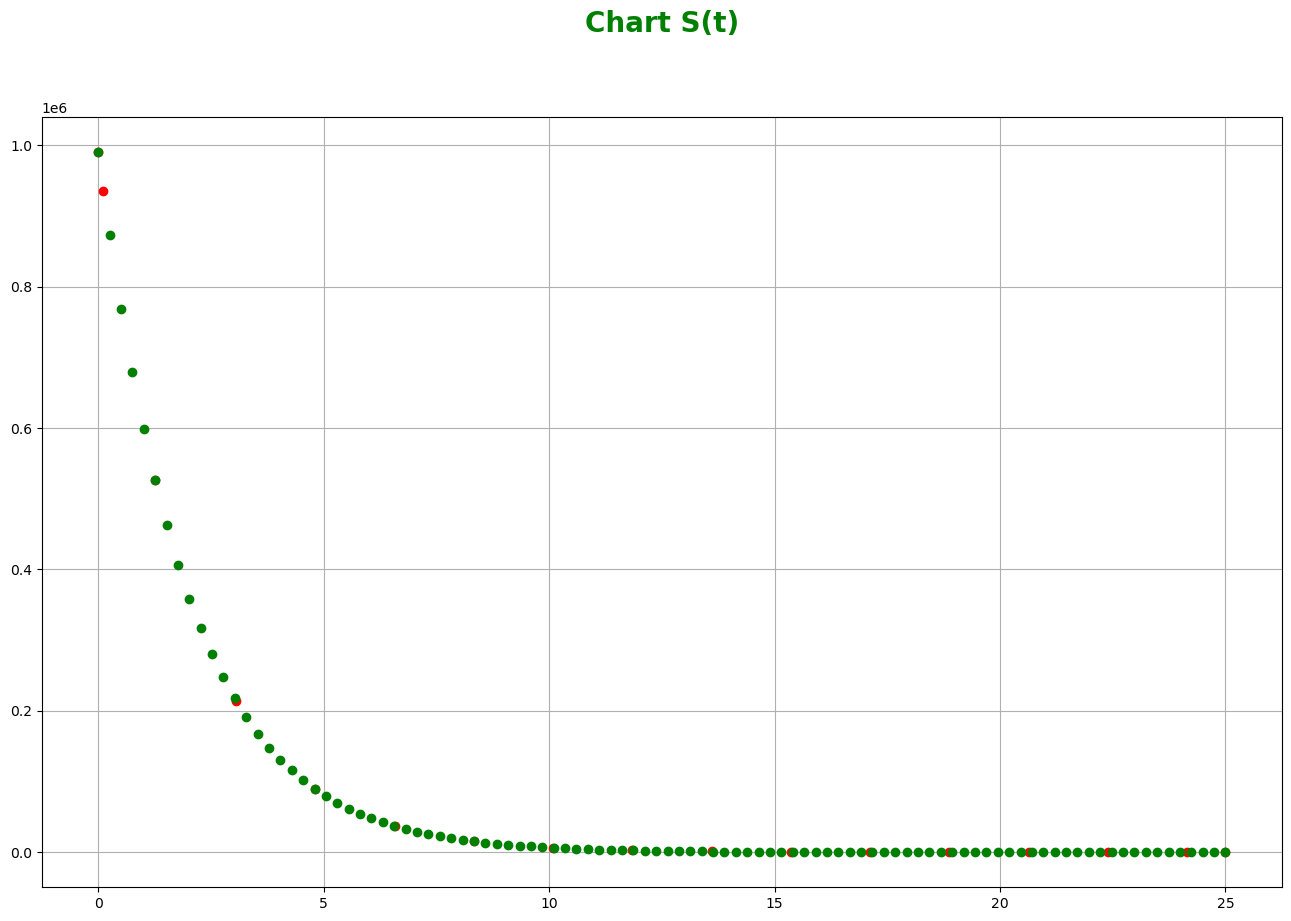

In [14]:
plt.rcParams['figure.figsize'] =(16,10)
t1, y1 = soln.t, soln.y[0]

fs = interp1d(t1, y1, kind='quadratic')
plt.plot(t1, y1, 'o', color='r')
plt.plot(t, fs(t), 'o', color='g')
plt.title('Chart S(t)', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.grid()
plt.show()

In [15]:
def dydt(t, i):
    return alpha*fs(t) - beta*i

soln2 = solve_ivp(dydt, (t0, tf), [I])
print(soln2)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.52620677e+00,
       3.40085242e+00, 5.58328773e+00, 8.41353263e+00, 1.15607014e+01,
       1.47078701e+01, 1.77815101e+01, 2.07712940e+01, 2.37314465e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.3040024 ,  79327.10689879,
        416304.61866376, 442243.13597293, 312653.92911182,
        161893.38329067,  69697.23148144,  28515.69864968,
         11637.20305844,   4811.26901602,   1994.70795666,
          1366.01089655]])
 y_events: None


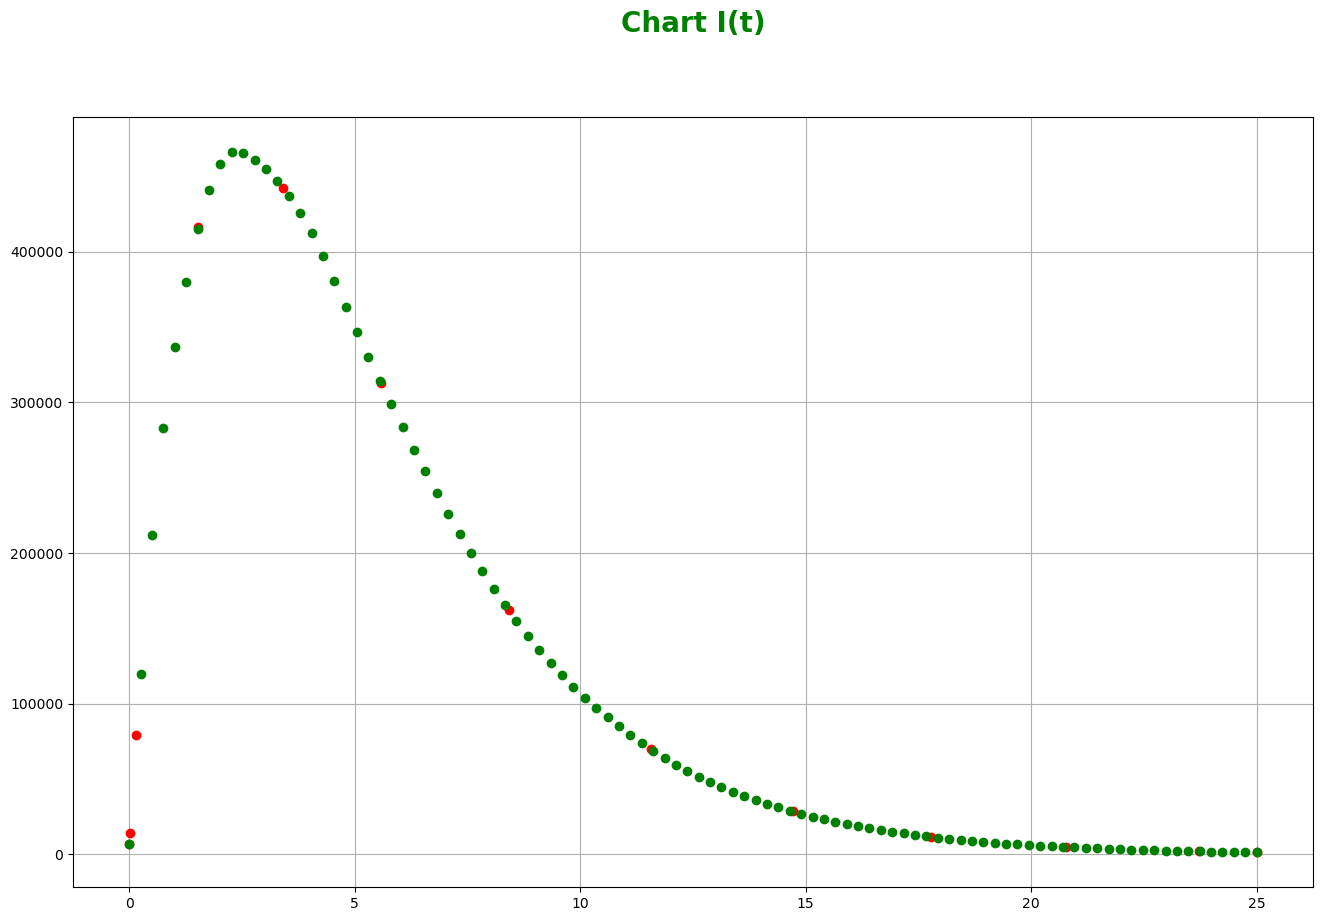

In [16]:
plt.rcParams['figure.figsize'] =(16,10)
t2, y2 = soln2.t, soln2.y[0]

fi = interp1d(t2, y2, kind='quadratic')
plt.plot(t2, y2, 'o', color='r')
plt.plot(t, fi(t), 'o', color='g')
plt.title('Chart I(t)', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.grid()
plt.show()

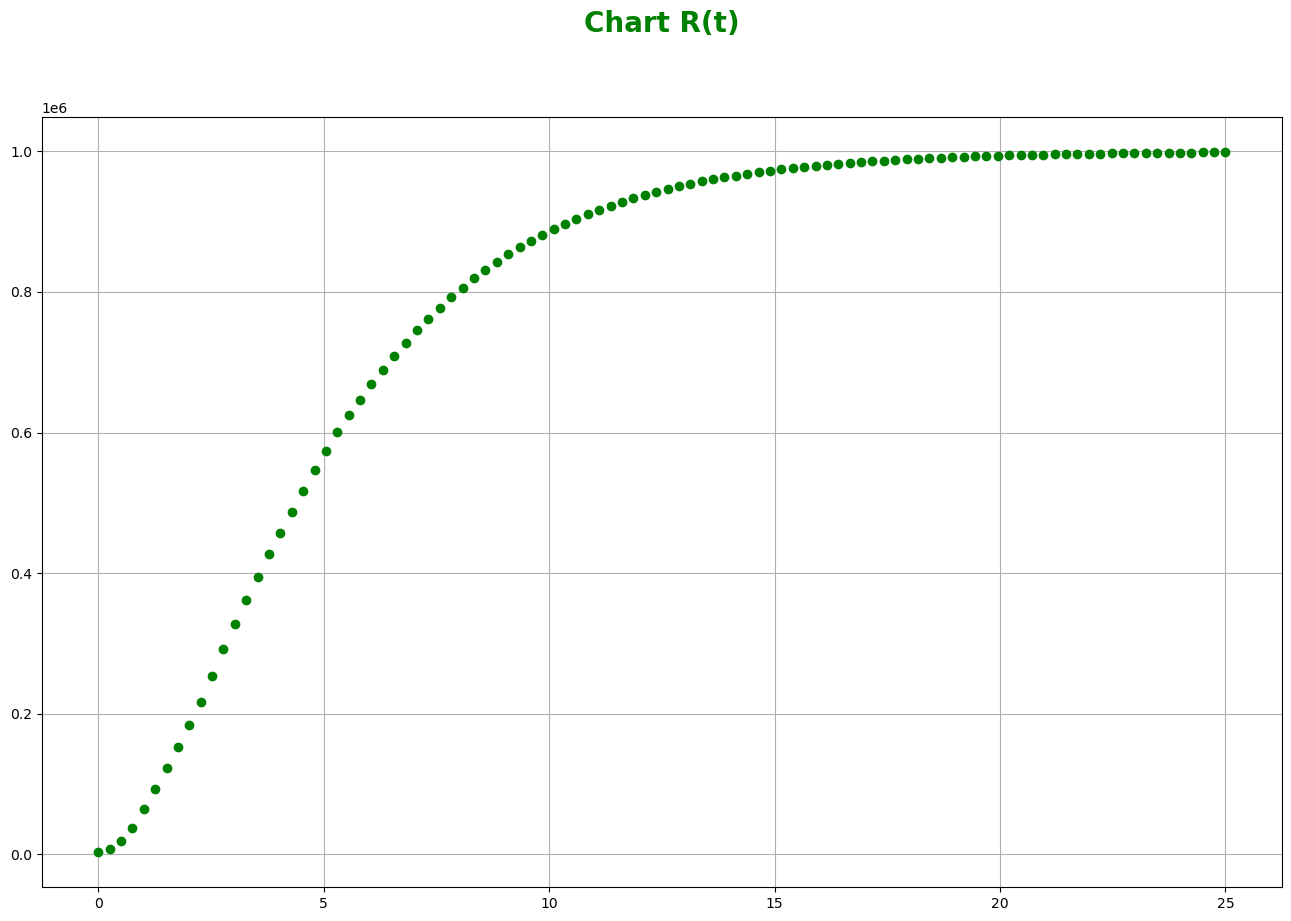

In [17]:
r = N-fs(t)-fi(t)
plt.plot(t, r, 'o', color='g')
plt.title('Chart R(t)', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.grid()
plt.show()

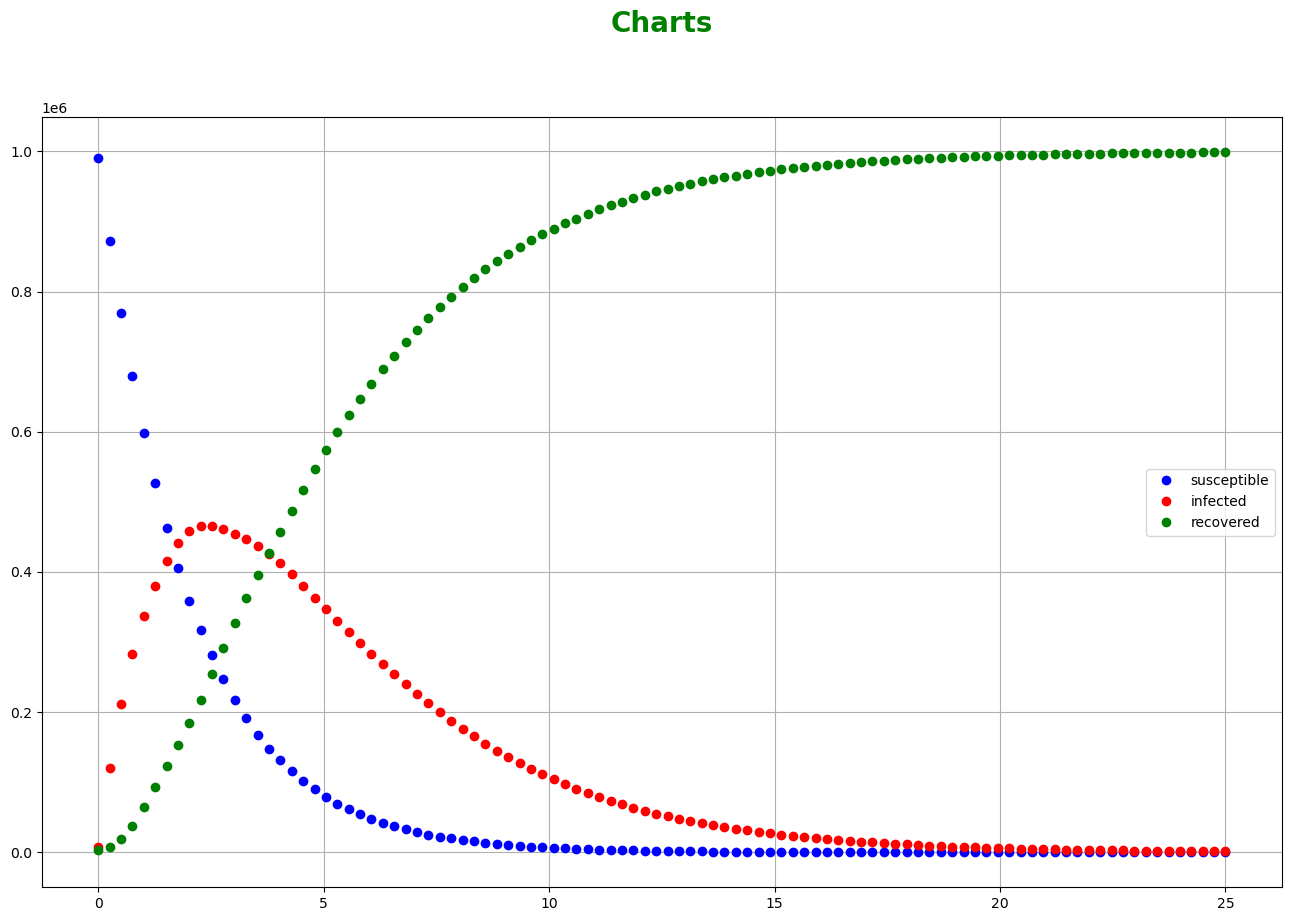

In [18]:
plt.rcParams['figure.figsize'] =(16,10)

plt.plot(t, fs(t), 'o', color='b', label='susceptible')
plt.plot(t, fi(t), 'o', color='r', label='infected')
plt.plot(t, r, 'o', color='g', label='recovered')

plt.title('Charts', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')

plt.grid()
plt.legend()
plt.show()

### Task 5.2
#### Во вторая части прошлого домашнего задания мы решали дифференциальные уравнения и строили графики. Продолжаем работать над этой домашней работой дальше.

Необхідно методом найменших квадратів:

* для набору даних графіка функції S(t) отримати рівняння виду S(t)=C0e−αt
* для набору даних графіка функції I(t) отримати рівняння виду I(t)=(I0+αS0t)e−αt

Для рівняння R(t) графік функції буде R(t)=N−S(t)−I(t)

* Побудувати всі три графіки S(t), I(t) та R(t) на одній області відображення отримані методом найменших квадратів
* Знайти час tmax у якому число інфекційних індивідів максимальне.

Потрібно за допомогою методу minimize_scalar знайти коли функція I(t)
досягає свого максимуму.

In [19]:
from scipy.optimize import leastsq, curve_fit, minimize_scalar

In [20]:
# Необхідно методом найменших квадратів:
# * для набору даних графіка функції S(t) отримати рівняння виду S(t)=C0e−αt

t1, y1 = soln.t, soln.y[0]

def func_s(t1, S, alpha):
    return S * np.exp(-alpha * t1)

def diff_s(p1, y1, t1):
    S, alpha = p1
    return y1 - func_s(t1, S, alpha)

p0 = (S, alpha)
aprx_s, _ = leastsq(diff_s, p0, args=(y1, t1))
aprx_s

array([9.89978640e+05, 4.99856001e-01])

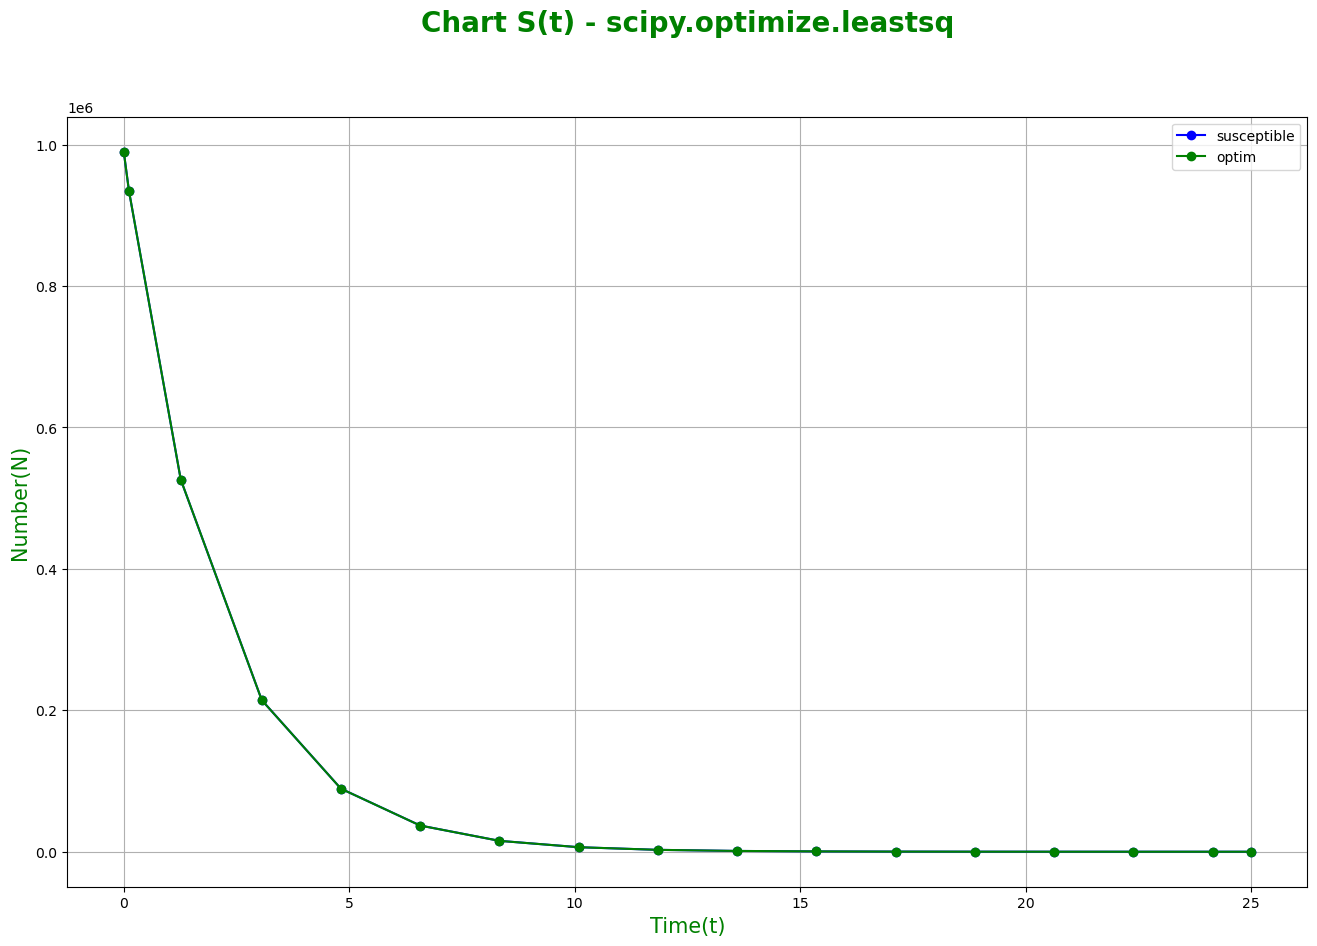

In [21]:
y_p = func_s(t1, aprx_s[0], aprx_s[1])

plt.grid()
plt.plot(t1, y1, 'o-', color='b', label='susceptible')
plt.plot(t1, y_p, 'o-', color='g', label='optim')

plt.title('Chart S(t) - scipy.optimize.leastsq', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.xlabel('Time(t)', fontsize=15, color='g')
plt.ylabel('Number(N)', fontsize=15, color='g')

plt.legend()
plt.show()

In [22]:
# Необхідно методом найменших квадратів:
# для набору даних графіка функції I(t) отримати рівняння виду I(t)=(I0+αS0t)e−αt

t2, y2 = soln2.t, soln2.y[0]

def func_i(t2, S, I, alpha):
    return (I + alpha * S * t2) * np.exp((-1) * alpha * t2)

def diff_i(p2, y2, t2):
    S, I, alpha = p2
    return y2 - func_i(t2, S, I, alpha)

p0 = (S, I, alpha)
aprx_i, _ = leastsq(diff_i, p0, args=(y2, t2))
aprx_i

array([1.25178699e+06, 8.08333668e+03, 3.83944901e-01])

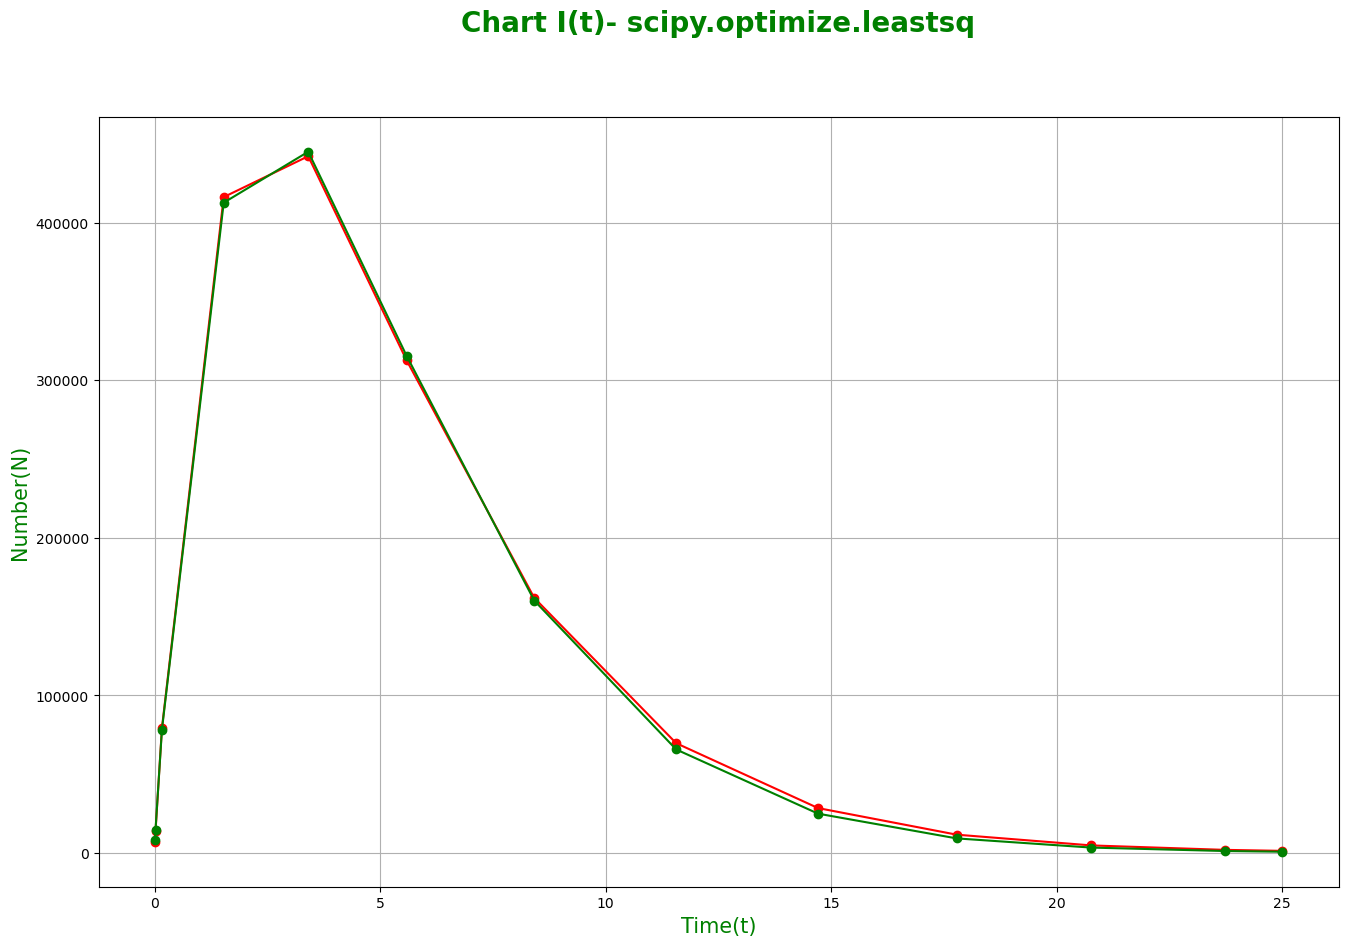

In [23]:
plt.rcParams['figure.figsize'] =(16,10)
plt.grid()

plt.plot(t2, y2, 'o-', color='r')
plt.plot(t2, func_i(t2, aprx_i[0], aprx_i[1], aprx_i[2] ), 'o-', color='g')

plt.title('Chart I(t)- scipy.optimize.leastsq', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.xlabel('Time(t)', fontsize=15, color='g')
plt.ylabel('Number(N)', fontsize=15, color='g')

plt.show()

In [24]:
# Для рівняння R(t) графік функції буде R(t)=N−S(t)−I(t)

R2 = N - func_s(t2, aprx_s[0], aprx_s[1]) - func_i(t2, aprx_i[0], aprx_i[1], aprx_i[2])

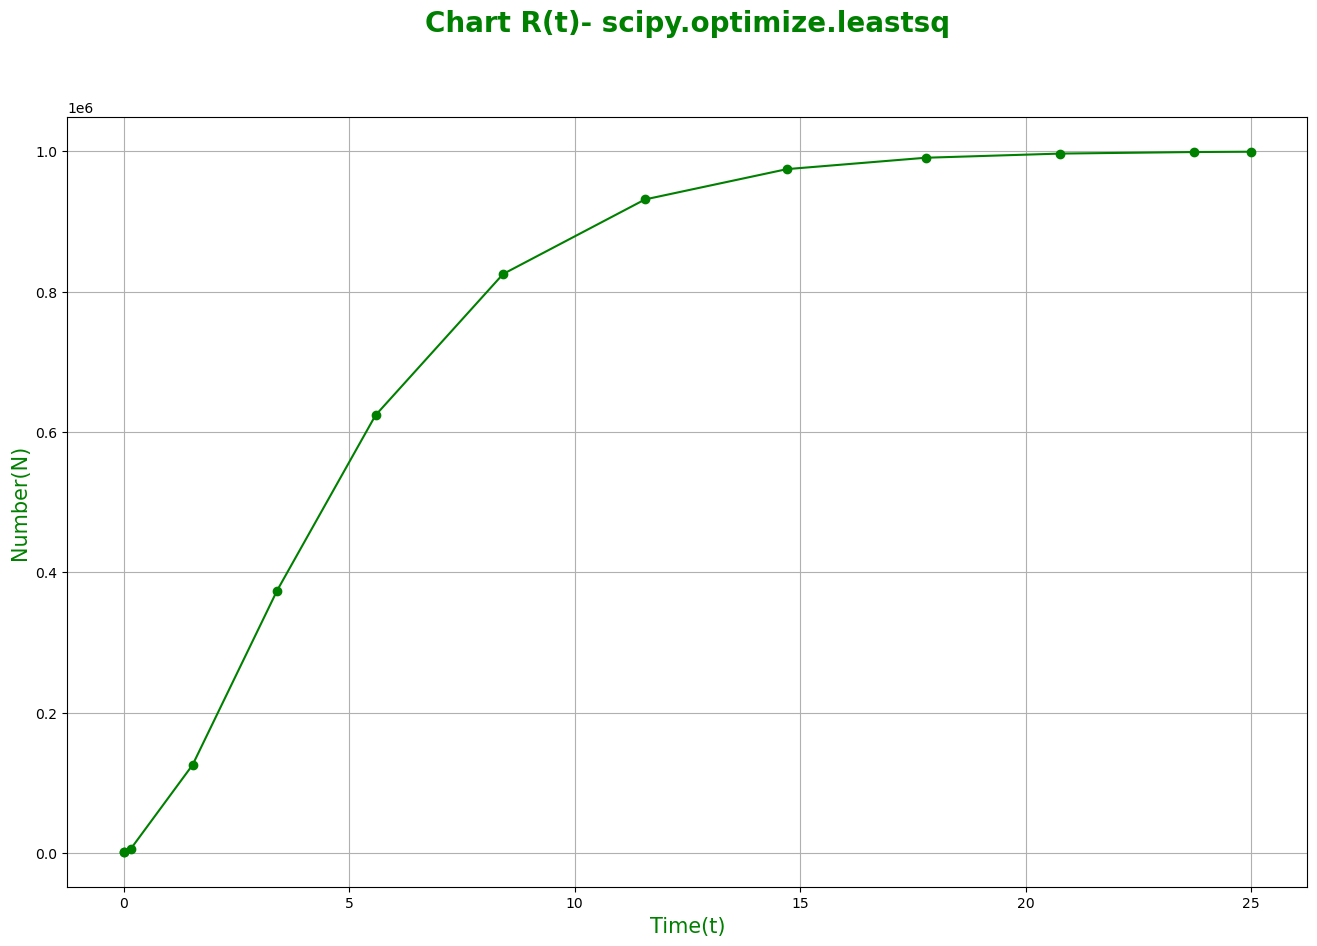

In [25]:
plt.rcParams['figure.figsize'] =(16,10)
plt.grid()

plt.plot(t2, R2, 'o-', color='g')

plt.title('Chart R(t)- scipy.optimize.leastsq', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.xlabel('Time(t)', fontsize=15, color='g')
plt.ylabel('Number(N)', fontsize=15, color='g')

plt.show()

In [26]:
# Побудувати всі три графіки S(t), I(t) та R(t) на одній області відображення отримані методом найменших квадратів

time = np.linspace(0,25,200)

def S_t(time):
    return aprx_s[0] * np.exp(-aprx_s[1] * time)

def I_t(time):
    return (aprx_i[1] + aprx_i[2] * aprx_i[0] * time) * np.exp((-1) * aprx_i[2] * time)

def R_t(time):
    return N - S_t(time) - I_t(time)

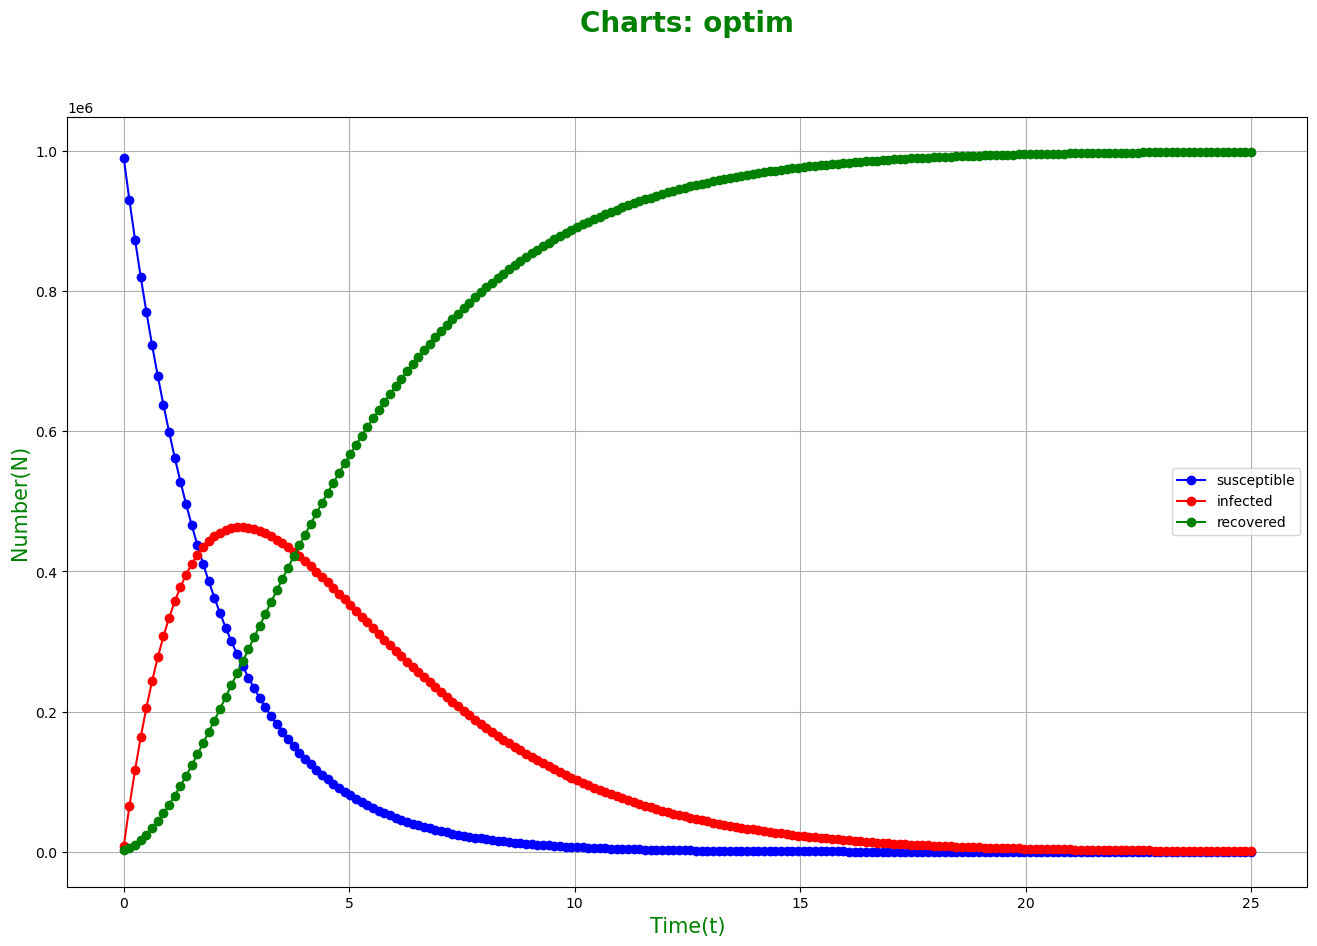

In [27]:
plt.rcParams['figure.figsize'] =(16,10)

plt.plot(time, S_t(time), 'o-', color='b', label='susceptible')
plt.plot(time, I_t(time), 'o-', color='r', label='infected')
plt.plot(time, R_t(time), 'o-', color='g', label='recovered')

plt.title('Charts: optim', fontsize=20, weight='bold', x=0.5, y=1.1, color='g')
plt.xlabel('Time(t)', fontsize=15, color='g')
plt.ylabel('Number(N)', fontsize=15, color='g')

plt.grid()
plt.legend()
plt.show()

In [28]:
# Знайти час tmax у якому число інфекційних індивідів максимальне.

result = minimize_scalar(lambda x: -I_t(x), bounds=(0, 5))
result.x

2.5877217653582254